# Energy efficiency Data Set

Data Set Information:

We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses.


Attribute Information:

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Specifically:
X1 Relative Compactness,
X2 Surface Area,
X3 Wall Area,
X4 Roof Area,
X5 Overall Height,
X6 Orientation,
X7 Glazing Area,
X8 Glazing Area Distribution,
y1 Heating Load,
y2 Cooling Load

To evaluate the model performance , we willl perform Regression on this dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_energy=pd.read_csv("energy_efficiency.csv")
df_energy

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [3]:
df_energy.columns=['Relative_Compactness','Surface_Area','Wall_Area','Roof_Area','Overall_Height','Orientation','Glazing_Area','Glazing_Area _Distribution','Heating_Load','Cooling_Load']

In [4]:
df_energy.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area _Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
df_energy.tail()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area _Distribution,Heating_Load,Cooling_Load
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


In [6]:
df_energy.shape

(768, 10)

In [7]:
df_energy.dtypes

Relative_Compactness          float64
Surface_Area                  float64
Wall_Area                     float64
Roof_Area                     float64
Overall_Height                float64
Orientation                     int64
Glazing_Area                  float64
Glazing_Area _Distribution      int64
Heating_Load                  float64
Cooling_Load                  float64
dtype: object

In [8]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Relative_Compactness          768 non-null float64
Surface_Area                  768 non-null float64
Wall_Area                     768 non-null float64
Roof_Area                     768 non-null float64
Overall_Height                768 non-null float64
Orientation                   768 non-null int64
Glazing_Area                  768 non-null float64
Glazing_Area _Distribution    768 non-null int64
Heating_Load                  768 non-null float64
Cooling_Load                  768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [9]:
df_energy.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area _Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [10]:
df_energy.isnull().sum()

Relative_Compactness          0
Surface_Area                  0
Wall_Area                     0
Roof_Area                     0
Overall_Height                0
Orientation                   0
Glazing_Area                  0
Glazing_Area _Distribution    0
Heating_Load                  0
Cooling_Load                  0
dtype: int64

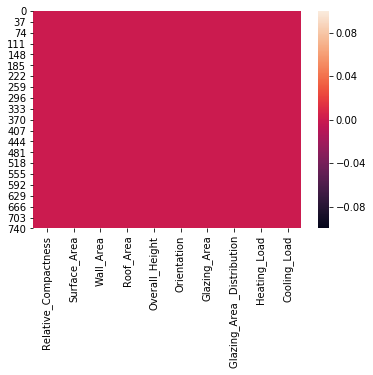

In [11]:
sns.heatmap(df_energy.isnull())

In [12]:
df_energy.corr()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area _Distribution,Heating_Load,Cooling_Load
Relative_Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,0.000000,1.283986e-17,1.764620e-17,0.622272,0.634339
Surface_Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,0.000000,1.318356e-16,-3.558613e-16,-0.658120,-0.672999
Wall_Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,0.000000,-7.969726e-19,0.000000e+00,0.455671,0.427117
Roof_Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,0.000000,-1.381805e-16,-1.079129e-16,-0.861828,-0.862547
Overall_Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,0.000000,1.861418e-18,0.000000e+00,0.889431,0.895785
Orientation,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,-0.002587,0.014290
Glazing_Area,1.283986e-17,1.318356e-16,-7.969726e-19,-1.381805e-16,1.861418e-18,0.000000,1.000000e+00,2.129642e-01,0.269841,0.207505
Glazing_Area _Distribution,1.764620e-17,-3.558613e-16,0.000000e+00,-1.079129e-16,0.000000e+00,0.000000,2.129642e-01,1.000000e+00,0.087368,0.050525
Heating_Load,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-0.002587,2.698410e-01,8.736759e-02,1.000000,0.975862
Cooling_Load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,0.014290,2.075050e-01,5.052512e-02,0.975862,1.000000


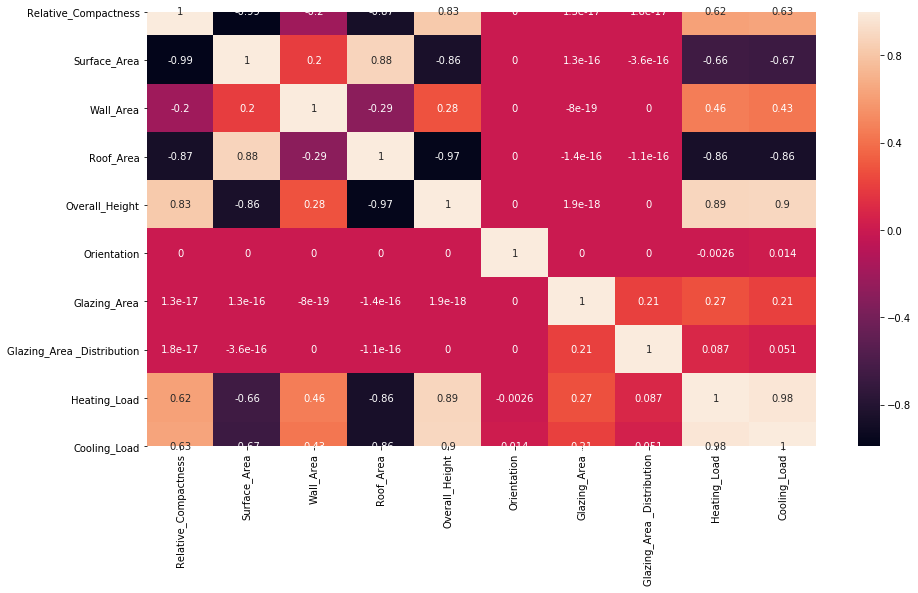

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(df_energy.corr(),annot=True)
plt.show()

In [14]:
#Suppressing scientific notation
import locale
pd.set_option('display.float_format', lambda x: locale.format('%.5f', x, grouping=True))
df_energy.corr()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area _Distribution,Heating_Load,Cooling_Load
Relative_Compactness,1.00000,-0.99190,-0.20378,-0.86882,0.82775,0.00000,0.00000,0.00000,0.62227,0.63434
Surface_Area,-0.99190,1.00000,0.19550,0.88072,-0.85815,0.00000,0.00000,-0.00000,-0.65812,-0.67300
Wall_Area,-0.20378,0.19550,1.00000,-0.29232,0.28098,0.00000,-0.00000,0.00000,0.45567,0.42712
Roof_Area,-0.86882,0.88072,-0.29232,1.00000,-0.97251,0.00000,-0.00000,-0.00000,-0.86183,-0.86255
Overall_Height,0.82775,-0.85815,0.28098,-0.97251,1.00000,0.00000,0.00000,0.00000,0.88943,0.89579
Orientation,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,-0.00259,0.01429
Glazing_Area,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,1.00000,0.21296,0.26984,0.20750
Glazing_Area _Distribution,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.21296,1.00000,0.08737,0.05053
Heating_Load,0.62227,-0.65812,0.45567,-0.86183,0.88943,-0.00259,0.26984,0.08737,1.00000,0.97586
Cooling_Load,0.63434,-0.67300,0.42712,-0.86255,0.89579,0.01429,0.20750,0.05053,0.97586,1.00000


In [15]:

df_energy.skew()

Relative_Compactness          0.49551
Surface_Area                 -0.12513
Wall_Area                     0.53342
Roof_Area                    -0.16276
Overall_Height                0.00000
Orientation                   0.00000
Glazing_Area                 -0.06025
Glazing_Area _Distribution   -0.08869
Heating_Load                  0.36045
Cooling_Load                  0.39599
dtype: float64

<Figure size 3600x1800 with 0 Axes>

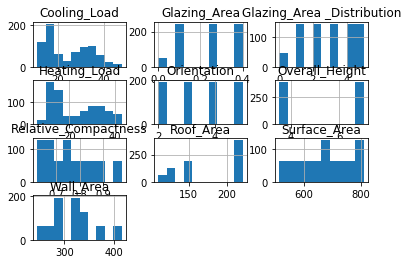

In [16]:
plt.figure(figsize=(50,25))
df_energy.hist()
plt.show()

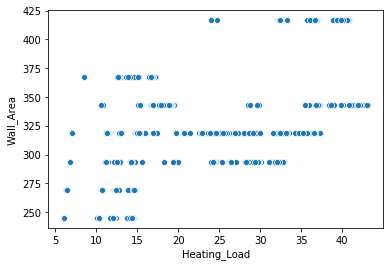

In [17]:
sns.scatterplot(x='Heating_Load',y='Wall_Area',data=df_energy)

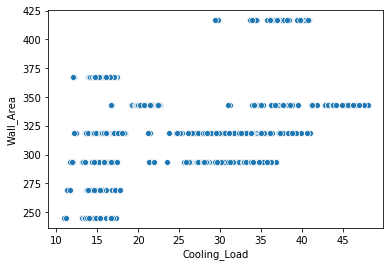

In [18]:
sns.scatterplot(x='Cooling_Load',y='Wall_Area',data=df_energy)

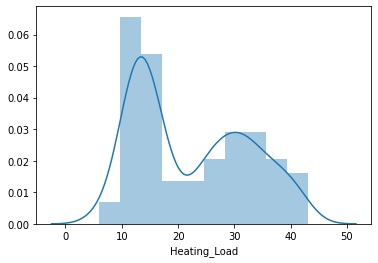

In [19]:
sns.distplot(df_energy['Heating_Load'])

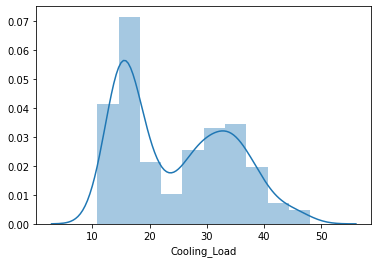

In [20]:
sns.distplot(df_energy['Cooling_Load'])

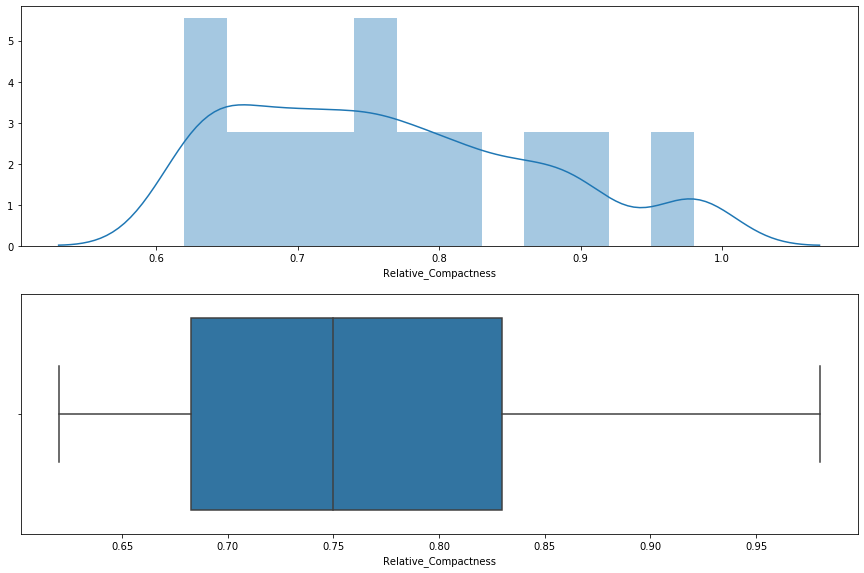

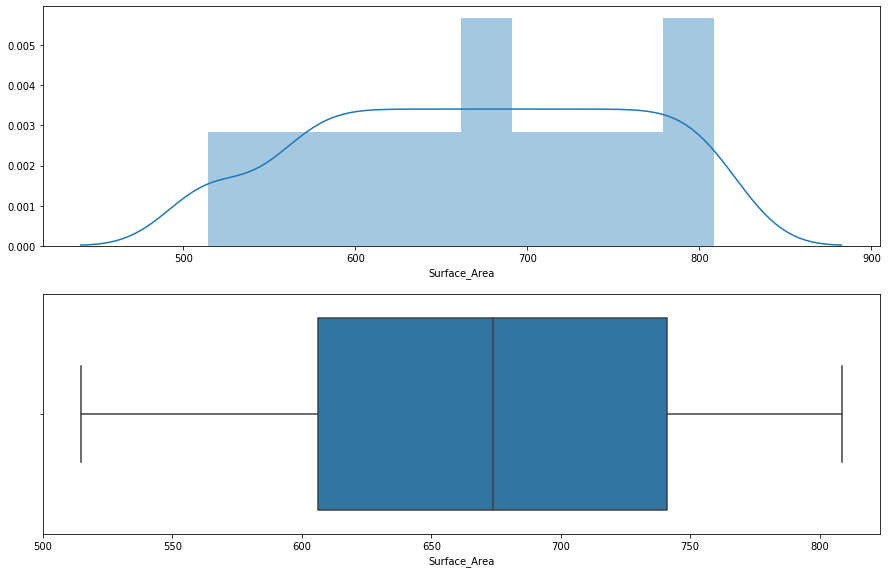

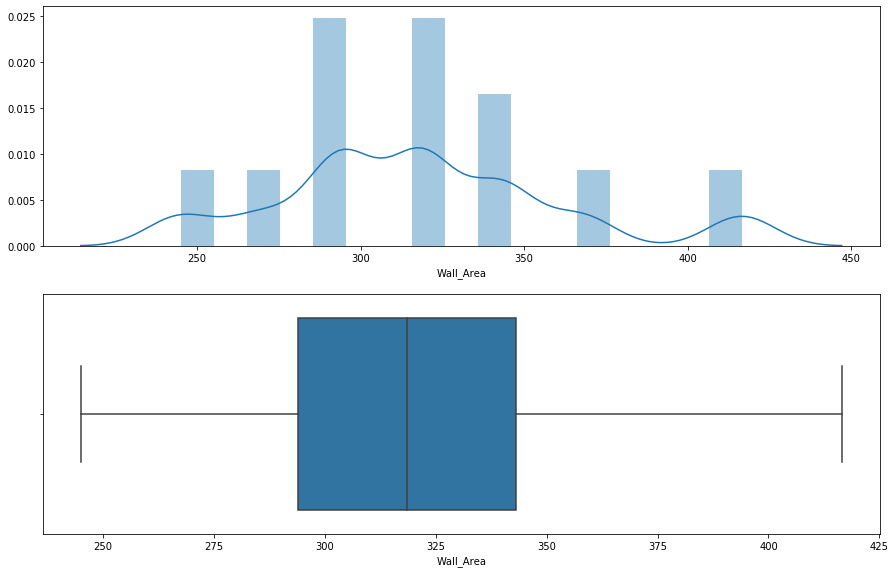

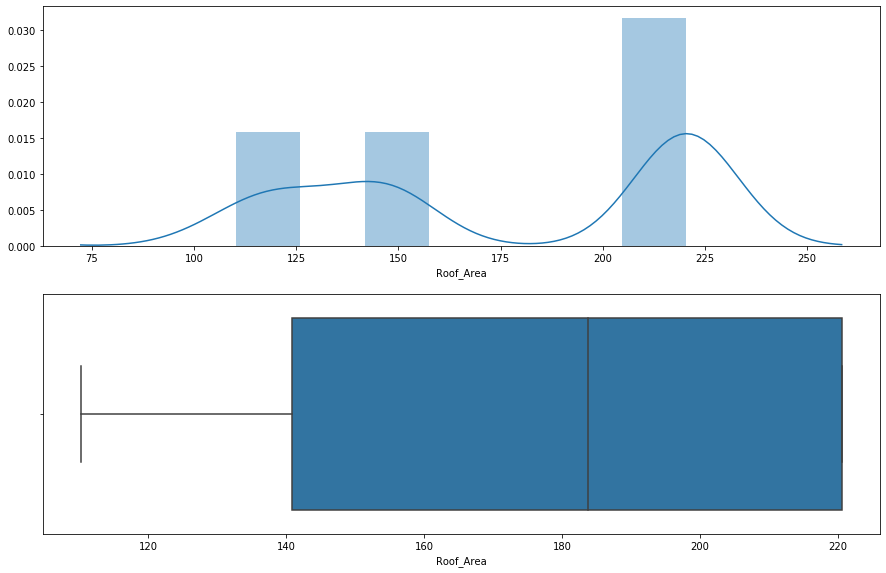

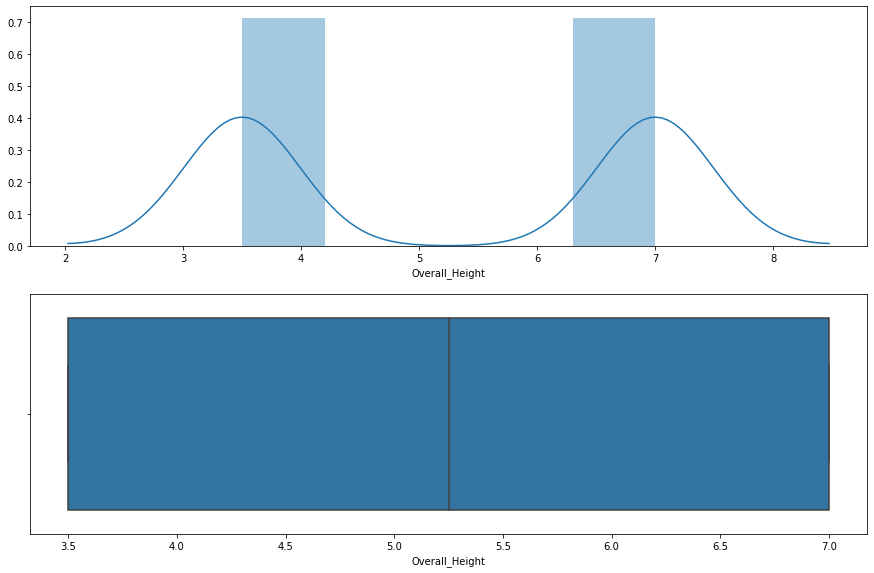

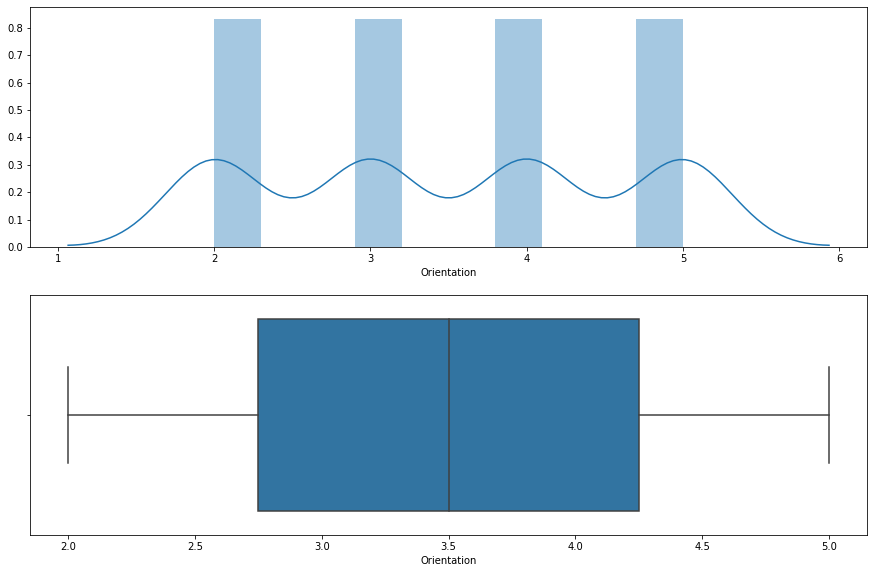

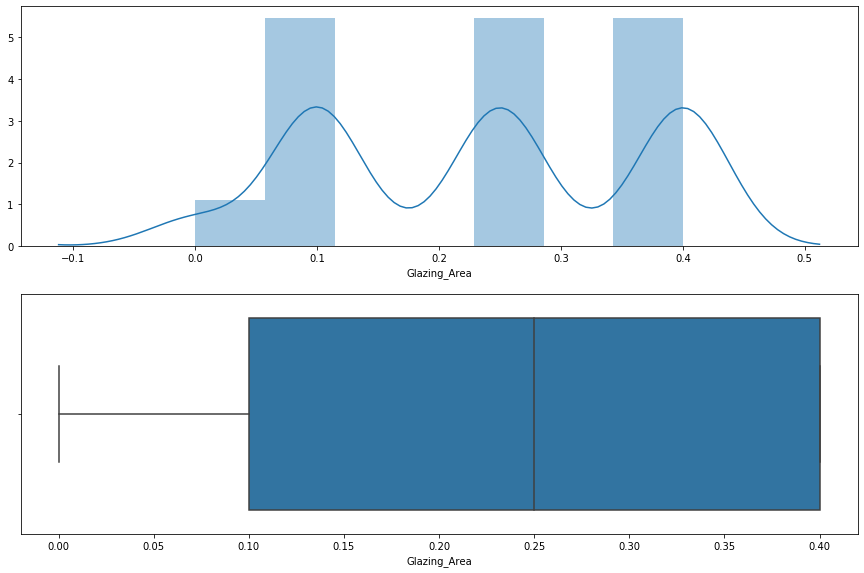

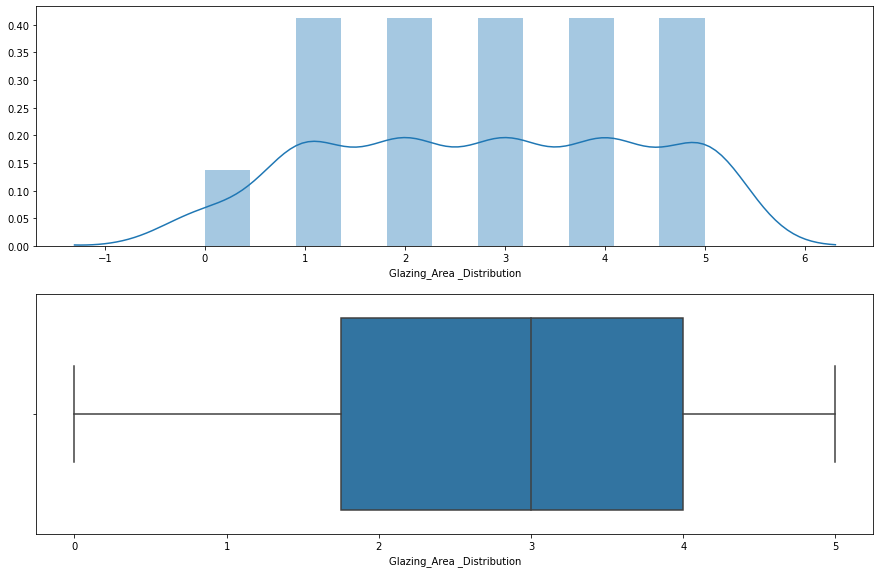

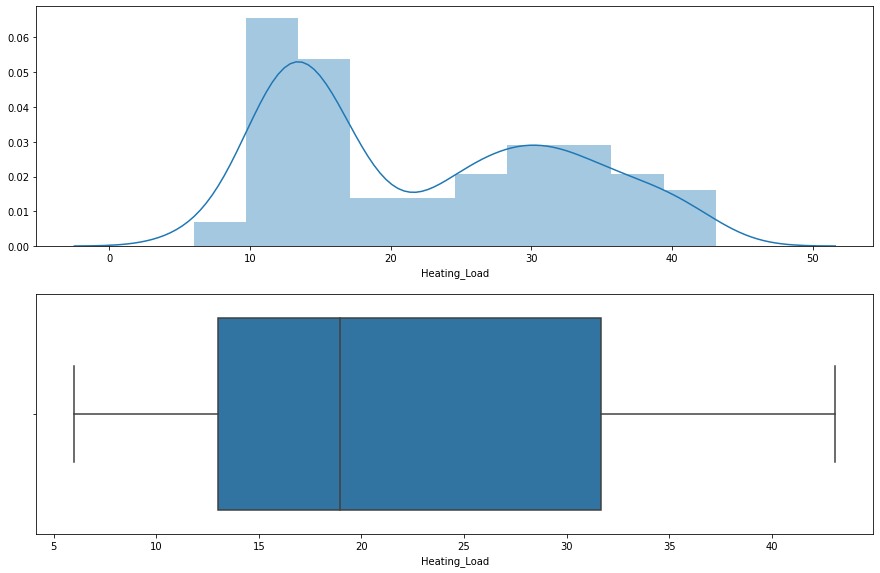

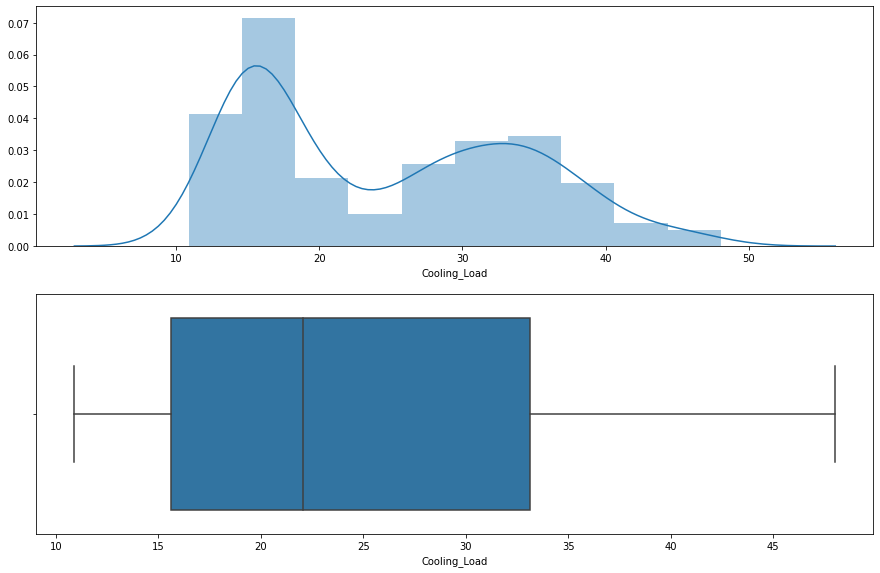

In [21]:
for i in df_energy:
    plt.figure(figsize=(15,15))
    plt.subplot(311)
    sns.distplot(df_energy[i])
    plt.subplot(312)
    sns.boxplot(df_energy[i])

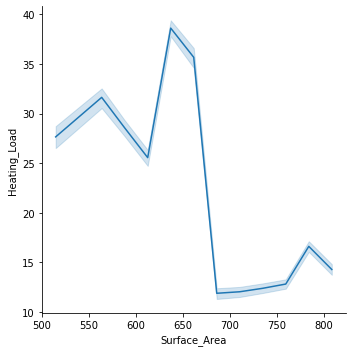

In [22]:
sns.relplot(x="Surface_Area", y="Heating_Load", kind="line", data=df_energy)

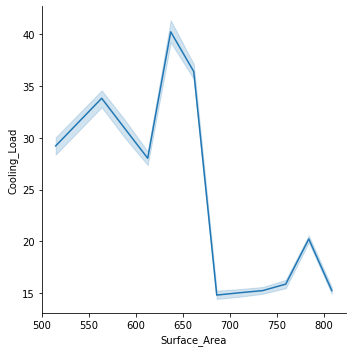

In [23]:
sns.relplot(x="Surface_Area", y="Cooling_Load", kind="line", data=df_energy)

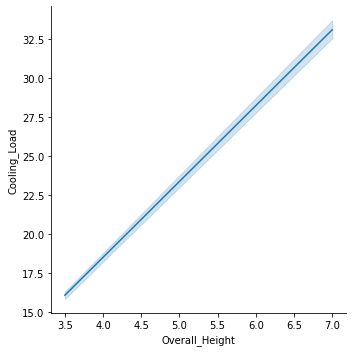

In [24]:
sns.relplot(x="Overall_Height", y="Cooling_Load", kind="line", data=df_energy)

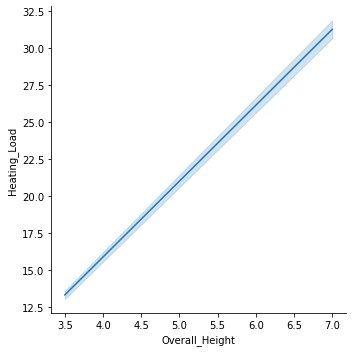

In [25]:
sns.relplot(x="Overall_Height", y="Heating_Load", kind="line", data=df_energy)

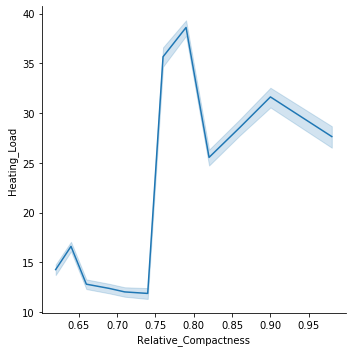

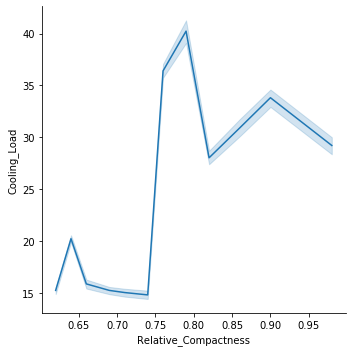

In [26]:
sns.relplot(x="Relative_Compactness", y="Heating_Load", kind="line", data=df_energy)
sns.relplot(x="Relative_Compactness", y="Cooling_Load", kind="line", data=df_energy)


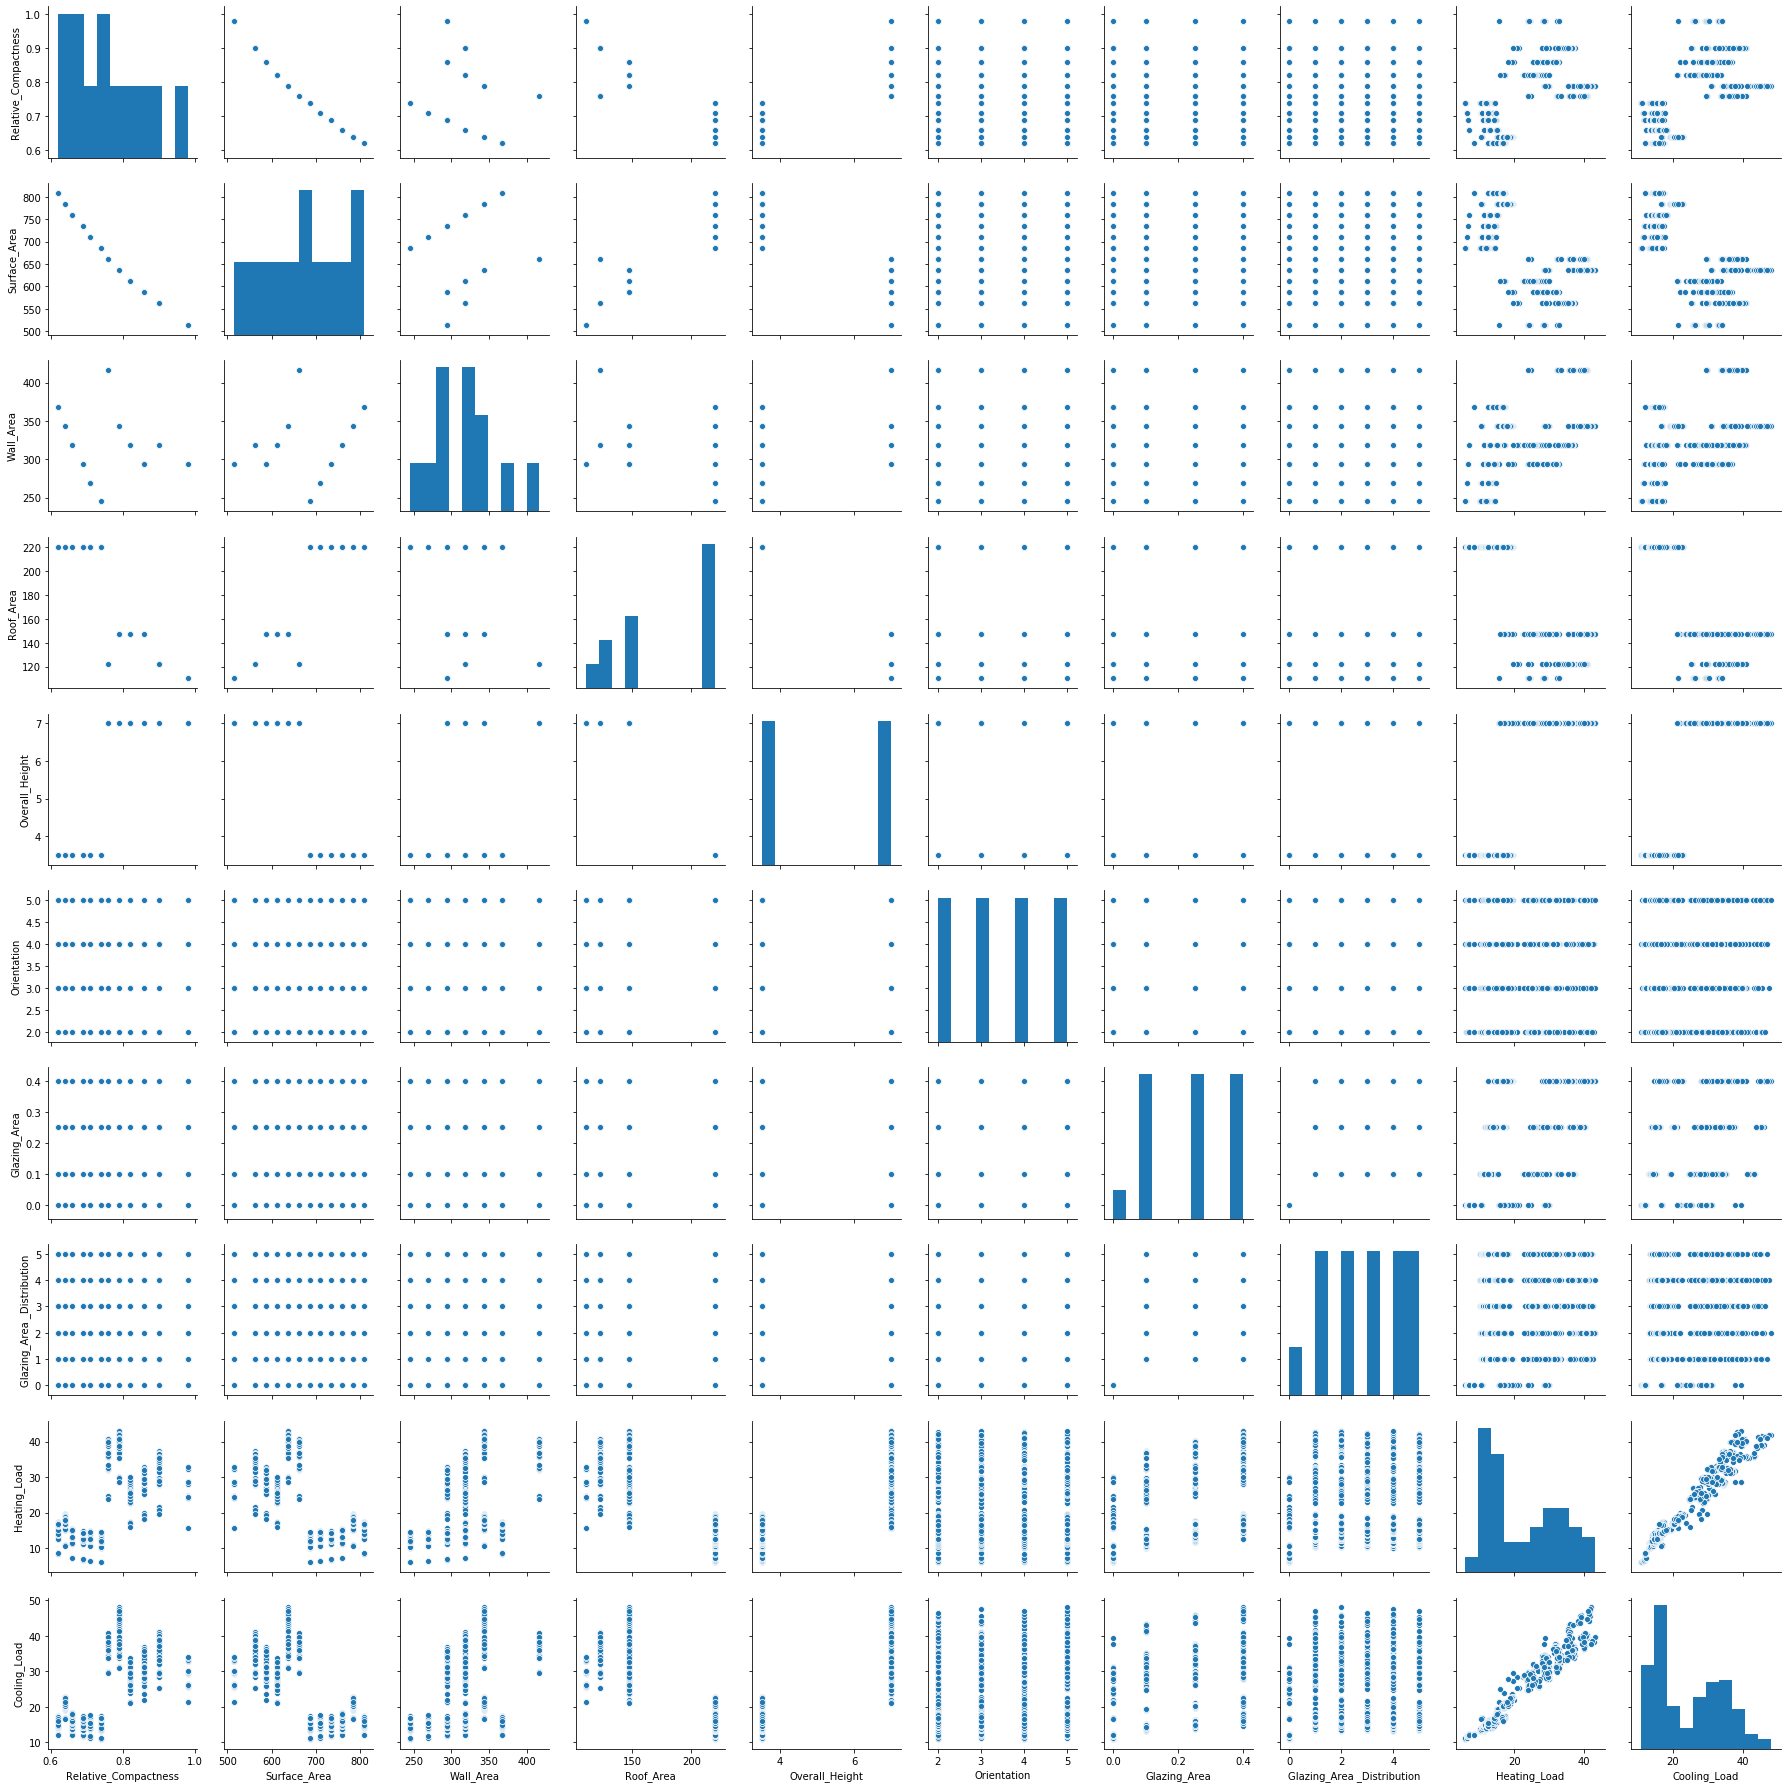

In [27]:
sns.pairplot(df_energy)

In [28]:
df_x = df_energy.drop(columns=['Heating_Load','Cooling_Load'])
df_y = df_energy[['Heating_Load','Cooling_Load']]

In [29]:
df_x

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area _Distribution
0,0.98000,514.50000,294.00000,110.25000,7.00000,2,0.00000,0
1,0.98000,514.50000,294.00000,110.25000,7.00000,3,0.00000,0
2,0.98000,514.50000,294.00000,110.25000,7.00000,4,0.00000,0
3,0.98000,514.50000,294.00000,110.25000,7.00000,5,0.00000,0
4,0.90000,563.50000,318.50000,122.50000,7.00000,2,0.00000,0
...,...,...,...,...,...,...,...,...
763,0.64000,784.00000,343.00000,220.50000,3.50000,5,0.40000,5
764,0.62000,808.50000,367.50000,220.50000,3.50000,2,0.40000,5
765,0.62000,808.50000,367.50000,220.50000,3.50000,3,0.40000,5
766,0.62000,808.50000,367.50000,220.50000,3.50000,4,0.40000,5


In [30]:
df_y

,Heating_Load,Cooling_Load
0,15.55000,21.33000
1,15.55000,21.33000
2,15.55000,21.33000
3,15.55000,21.33000
4,20.84000,28.28000
...,...,...
763,17.88000,21.40000
764,16.54000,16.88000
765,16.44000,17.11000
766,16.48000,16.61000


In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
df_x=sc.transform(df_x)

In [32]:
df_x

array([[ 2.04177671, -1.78587489, -0.56195149, ..., -1.34164079,
        -1.76044698, -1.81457514],
       [ 2.04177671, -1.78587489, -0.56195149, ..., -0.4472136 ,
        -1.76044698, -1.81457514],
       [ 2.04177671, -1.78587489, -0.56195149, ...,  0.4472136 ,
        -1.76044698, -1.81457514],
       ...,
       [-1.36381225,  1.55394308,  1.12390297, ..., -0.4472136 ,
         1.2440492 ,  1.41133622],
       [-1.36381225,  1.55394308,  1.12390297, ...,  0.4472136 ,
         1.2440492 ,  1.41133622],
       [-1.36381225,  1.55394308,  1.12390297, ...,  1.34164079,
         1.2440492 ,  1.41133622]])

In [33]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,df_x,df_y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, df_y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [34]:
from sklearn.model_selection import cross_val_score
def model_evaluation(model,df_x,df_y):
    c_scores=cross_val_score(model,df_x,df_y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

KNR=KNeighborsRegressor()
DTR=DecisionTreeRegressor()
ETR=ExtraTreesRegressor()
RFR=RandomForestRegressor()
models=[]

models.append(('ExtraTreesRegressor',ETR))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('RandomForestRegressor',RFR))

In [36]:

Model=[]
R2_score=[]
cvs=[]
MSE=[]
MAX_RANDOM_STATE=[]
for name,model in models:
    print('*********************************',name,'*********************************')
    print('\n',model)
    Model.append(name)
    max_r_state=maxr2_score(model,df_x,df_y)
    print('Max.Random_State=',max_r_state)
    MAX_RANDOM_STATE.append(max_r_state)
    x_train, x_test, y_train, y_test = train_test_split(df_x, df_y,random_state = max_r_state,test_size=0.20)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pre)
    print("Mean_Squared_Error =",mse)
    MSE.append(round(mse,3))
    score= cross_val_score(model,df_x,df_y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

********************************* ExtraTreesRegressor *********************************

 ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators='warn',
                    n_jobs=None, oob_score=False, random_state=None, verbose=0,
                    warm_start=False)
max r2 score corresponding to  55  is  0.9869249002754353
Max.Random_State= 55
R2_score =  0.985415944487422
Mean_Squared_Error = 1.3852454383116906
Cross_Val_Score =  0.9596052189839787


********************************* DecisionTreeRegressor *********************************

 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impur

In [37]:
result = pd.DataFrame({'Model': Model,'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Cross_val_score
0,ExtraTreesRegressor,0.98542,1.38500,0.95961
1,DecisionTreeRegressor,0.98051,1.83000,0.95583
2,KNeighborsRegressor,0.95366,4.41700,0.93490
3,RandomForestRegressor,0.98483,1.44300,0.96136


Grid Search CV - Decision Tree Regressor

In [38]:
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y,random_state = 43,test_size=0.20)
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

grid_cv_dtr = GridSearchCV(DTR, param_grid, cv=10,scoring='r2')
grid_cv_dtr.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                

In [39]:
print("Best Score::{}".format(grid_cv_dtr.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtr.best_params_))

Best Score::0.9488572780244132
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 6, 'max_leaf_nodes': 20, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [40]:
DTR_CV=DecisionTreeRegressor(criterion='mse', max_depth=6,
                      max_leaf_nodes=20,
                      min_samples_leaf=20,
                      min_samples_split=10)
DTR_CV.fit(x_train,y_train)
score=cross_val_score(DTR,df_x,df_y,cv=10,scoring='r2').mean()
score

0.9558342904891546

In [41]:
#Predicting using Decison Tree Regressor
preddtr=DTR.predict(x_test)
print("Mean absolute error:",mean_absolute_error(y_test,preddtr))
print("Mean squared error:",mean_squared_error(y_test,preddtr))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,preddtr)))
print("R2 score:",r2_score(y_test,preddtr))

Mean absolute error: 0.6323376623376625
Mean squared error: 1.8296538961038962
Root mean squared error: 1.3526469961168346
R2 score: 0.9805123483694149


In [42]:
#Predicting using Decison Tree Regressor - Grid Search CV
preddtr_cv=DTR_CV.predict(x_test)
print("Mean absolute error:",mean_absolute_error(y_test,preddtr_cv))
print("Mean squared error:",mean_squared_error(y_test,preddtr_cv))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,preddtr_cv)))
print("R2 score:",r2_score(y_test,preddtr_cv))

Mean absolute error: 1.2960845472987699
Mean squared error: 3.1158994979014594
Root mean squared error: 1.765191065551109
R2 score: 0.9680036279249135


Grid Search CV - RandomForestRegressor

In [43]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y,random_state = 77,test_size=0.20)
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

grid_cv_rfr = GridSearchCV(RFR, param_grid, cv=10,scoring='r2')
grid_cv_rfr.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'bootstrap': [True, False],
      

In [44]:
print("Best Score::{}".format(grid_cv_rfr.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_rfr.best_params_))

Best Score::0.9818648790126719
Best Hyperparameters::
{'bootstrap': True, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 30}


In [45]:
RFR_CV=RandomForestRegressor(bootstrap=True,
                            max_features='log2',
                            min_samples_split=2,
                            random_state=77,
                            n_estimators=20)
RFR_CV.fit(x_train,y_train)
score=cross_val_score(DTR,x_train,y_train,cv=10,scoring='r2').mean()
score

0.9641336844622626

In [46]:
#Predicting using RandomForestRegressor
predrfr=RFR.predict(x_test)
print("Mean absolute error:",mean_absolute_error(y_test,predrfr))
print("Mean squared error:",mean_squared_error(y_test,predrfr))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,predrfr)))
print("R2 score:",r2_score(y_test,predrfr))

Mean absolute error: 0.32205519480519473
Mean squared error: 0.45882103571428556
Root mean squared error: 0.6773632966985188
R2 score: 0.9948796302449762


In [47]:
#Predicting using Random Forest Regressor - Grid Search CV
predrfr_cv=RFR_CV.predict(x_test)
print("Mean absolute error:",mean_absolute_error(y_test,predrfr_cv))
print("Mean squared error:",mean_squared_error(y_test,predrfr_cv))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,predrfr_cv)))
print("R2 score:",r2_score(y_test,predrfr_cv))

Mean absolute error: 0.6983847402597404
Mean squared error: 1.5496235836038965
Root mean squared error: 1.2448387781571943
R2 score: 0.9827373018412991


In [48]:
print("Predicted :",predrfr)
print("Actual:",y_test)

Predicted : [[28.673 30.314]
 [36.082 40.315]
 [29.076 31.28 ]
 [23.445 27.655]
 [10.672 14.139]
 [24.307 25.635]
 [28.883 31.067]
 [26.354 30.016]
 [11.414 14.361]
 [28.578 29.771]
 [23.681 24.798]
 [12.442 15.509]
 [41.541 43.309]
 [14.252 16.478]
 [24.602 26.328]
 [39.843 38.925]
 [31.977 33.99 ]
 [16.693 16.158]
 [15.218 19.274]
 [40.231 40.35 ]
 [14.522 17.127]
 [15.252 19.342]
 [12.191 14.817]
 [14.529 16.61 ]
 [11.993 14.654]
 [12.846 16.095]
 [28.568 30.964]
 [40.57  40.511]
 [11.182 14.095]
 [14.534 17.224]
 [24.518 29.729]
 [25.129 28.883]
 [35.926 40.224]
 [10.691 14.03 ]
 [10.423 13.708]
 [35.67  38.111]
 [34.694 36.745]
 [12.973 14.369]
 [18.882 21.605]
 [15.334 19.272]
 [25.449 26.871]
 [11.938 14.07 ]
 [26.192 27.926]
 [17.056 20.456]
 [15.244 19.36 ]
 [14.324 16.772]
 [29.304 30.478]
 [12.976 14.445]
 [28.56  29.741]
 [15.256 19.299]
 [36.403 36.791]
 [12.8   16.053]
 [14.569 17.067]
 [12.106 15.089]
 [32.654 33.317]
 [36.318 37.472]
 [16.858 20.231]
 [32.015 32.613]
 [

In [49]:
print("Predicted :",preddtr)
print("Actual:",y_test)

Predicted : [[14.66 17.37]
 [14.6  15.14]
 [31.66 36.2 ]
 [23.89 24.77]
 [12.63 14.23]
 [14.6  16.85]
 [11.21 14.55]
 [11.42 14.67]
 [17.15 16.99]
 [32.75 31.  ]
 [26.33 27.36]
 [11.34 14.81]
 [12.97 14.27]
 [36.86 34.25]
 [13.   14.28]
 [25.37 26.95]
 [19.68 29.6 ]
 [11.6  13.7 ]
 [12.45 15.5 ]
 [36.03 42.86]
 [12.25 15.23]
 [14.71 17.51]
 [28.15 30.19]
 [16.44 17.11]
 [15.2  19.43]
 [10.78 14.18]
 [32.85 32.95]
 [31.89 35.99]
 [19.   22.25]
 [11.16 14.27]
 [12.63 14.23]
 [16.44 17.11]
 [12.96 14.34]
 [35.89 43.3 ]
 [29.67 30.65]
 [13.05 15.89]
 [12.84 16.26]
 [22.79 28.79]
 [28.15 30.19]
 [13.95 14.89]
 [13.99 14.61]
 [15.12 19.26]
 [35.84 38.35]
 [28.66 34.73]
 [12.74 13.97]
 [24.96 29.43]
 [36.26 37.51]
 [12.95 15.73]
 [41.4  45.29]
 [14.66 15.64]
 [17.35 21.19]
 [27.03 25.82]
 [29.88 28.31]
 [16.56 20.37]
 [ 6.05 11.19]
 [28.15 30.19]
 [26.45 31.28]
 [12.3  15.24]
 [14.62 17.22]
 [39.83 36.66]
 [29.83 29.82]
 [24.35 25.64]
 [29.67 30.65]
 [31.84 31.6 ]
 [32.84 32.71]
 [35.4  39.22

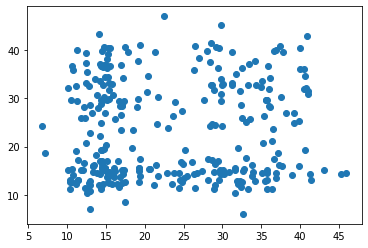

In [50]:
plt.scatter(y_test,preddtr)

Text(0, 0.5, 'Predictions')

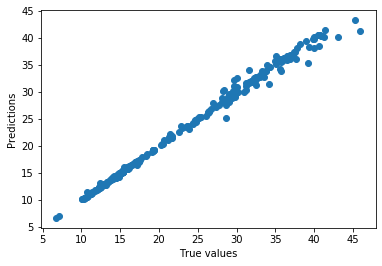

In [51]:
plt.scatter(y_test,predrfr)
plt.xlabel('True values')
plt.ylabel('Predictions')

Grid Search CV ExtraTreesRegressor

In [52]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y,random_state = 55,test_size=0.20)
param_grid={
        'n_estimators': [10,30,50],
        'min_samples_leaf': [3,4],
        'min_samples_split': [5,10,20],
        'bootstrap':[True,False]
    }

grid_cv_etr = GridSearchCV(ETR, param_grid, cv=10,scoring='r2')
grid_cv_etr.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=ExtraTreesRegressor(bootstrap=False, criterion='mse',
                                           max_depth=None, max_features='auto',
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=10, n_jobs=None,
                                           oob_score=False, random_state=None,
                                           verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'bootstrap': [True, False], 'min_samples_leaf': [3, 4],
                         'min_samples_split'

In [53]:
print("Best Score::{}".format(grid_cv_etr.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_etr.best_params_))

Best Score::0.9798388903596386
Best Hyperparameters::
{'bootstrap': False, 'min_samples_leaf': 3, 'min_samples_split': 20, 'n_estimators': 30}


In [54]:
ETR_CV=ExtraTreesRegressor(bootstrap=False,
                            min_samples_leaf=4,
                            min_samples_split=20,
                            n_estimators=10)
ETR_CV.fit(x_train,y_train)
score=cross_val_score(ETR,x_train,y_train,cv=10,scoring='r2').mean()
score

0.9766943557616342

In [55]:
#Predicting using ExtraTressRegressor
predetr=ETR.predict(x_test)
print("Mean absolute error:",mean_absolute_error(y_test,predetr))
print("Mean squared error:",mean_squared_error(y_test,predetr))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,predetr)))
print("R2 score:",r2_score(y_test,predetr))

Mean absolute error: 0.5874318181818186
Mean squared error: 1.3852454383116906
Root mean squared error: 1.1769645017211396
R2 score: 0.985415944487422


In [56]:
#Predicting using ExtraTressRegressor Grid CV
predetr_cv=ETR_CV.predict(x_test)
print("Mean absolute error:",mean_absolute_error(y_test,predetr_cv))
print("Mean squared error:",mean_squared_error(y_test,predetr_cv))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,predetr_cv)))
print("R2 score:",r2_score(y_test,predetr_cv))

Mean absolute error: 0.6910328961009965
Mean squared error: 1.4117807691522644
Root mean squared error: 1.188183811180856
R2 score: 0.9852219471159324


Text(0, 0.5, 'Predictions')

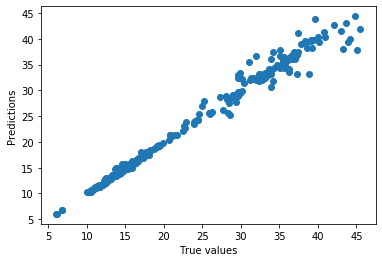

In [57]:
plt.scatter(y_test,predetr)
plt.xlabel('True values')
plt.ylabel('Predictions')

Grid Search CV KNeighborsRegressor 

In [58]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y,random_state = 72,test_size=0.20)
param_grid = {'n_neighbors': np.arange(1, 12, 2),
              'weights': ['uniform', 'distance'],
             'metric':['euclidean','manhattan']}

grid_cv_knr = GridSearchCV(KNR, param_grid, cv=10,scoring='r2',n_jobs=-1)
grid_cv_knr.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  3,  5,  7,  9, 11]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [59]:
print("Best Score::{}".format(grid_cv_knr.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_knr.best_params_))

Best Score::0.973803808810584
Best Hyperparameters::
{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [60]:
KNR_CV=KNeighborsRegressor(metric='manhattan',
                            weights='distance',
                            n_neighbors=5)
KNR_CV.fit(x_train,y_train)
score=cross_val_score(KNR,x_train,y_train,cv=10,scoring='r2').mean()
score

0.9282165948994969

In [61]:
#Predicting using KNeighborsRegressor
predknr=KNR.predict(x_test)
print("Mean absolute error:",mean_absolute_error(y_test,predknr))
print("Mean squared error:",mean_squared_error(y_test,predknr))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,predknr)))
print("R2 score:",r2_score(y_test,predknr))

Mean absolute error: 1.325383116883117
Mean squared error: 4.417369779220779
Root mean squared error: 2.1017539768538036
R2 score: 0.9536592734896762


In [62]:
#Predicting using KNeighborsRegressor Grod Search CV
predknr_cv=KNR_CV.predict(x_test)
print("Mean absolute error:",mean_absolute_error(y_test,predknr_cv))
print("Mean squared error:",mean_squared_error(y_test,predknr_cv))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,predknr_cv)))
print("R2 score:",r2_score(y_test,predknr_cv))

Mean absolute error: 0.837683472494351
Mean squared error: 1.5921293012954785
Root mean squared error: 1.261796061689637
R2 score: 0.9830878628954522


Text(0, 0.5, 'Predictions')

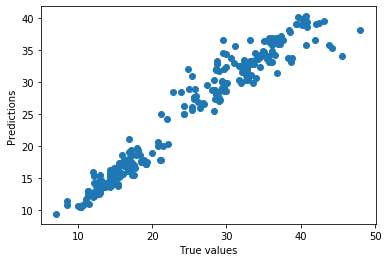

In [63]:
plt.scatter(y_test,predknr)
plt.xlabel('True values')
plt.ylabel('Predictions')

In [64]:
#Save the Model
from sklearn.externals import joblib 
joblib.dump(ETR, 'Model_Energy_Efficiency.pkl')

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['Model_Energy_Efficiency.pkl']